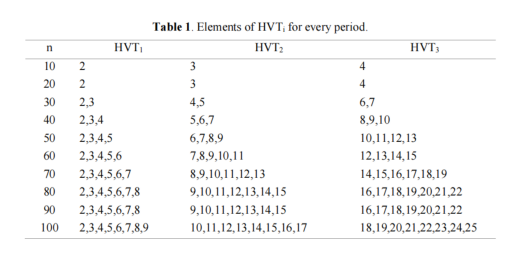

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('element.png')
plt.imshow(img)
plt.axis('off')  # Optional, untuk menyembunyikan sumbu
plt.show()

Edges dalam WAC4:
A -- D : 42
A -- C : 74
A -- B : 115
D -- G : 132
G -- E : 70
G -- H : 144
E -- J : 24
J -- F : 227
F -- I : 72
Total WAC4 Weight: 900


ValueError: not enough values to unpack (expected 3, got 1)

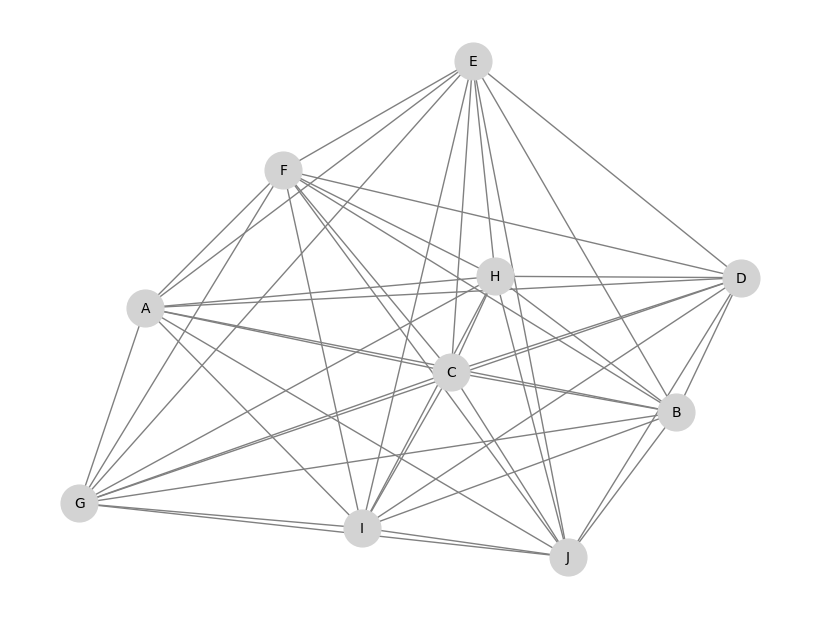

In [1]:
import networkx as nx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
class WAC4:
    def __init__(self, graph_data):
        self.graph = nx.Graph()
        self.tree = nx.Graph()
        self.installed = set()

        # Memasukkan data graf ke dalam NetworkX
        for node, edges in graph_data.items():
            for neighbor, weight in edges:
                self.graph.add_edge(node, neighbor, weight=weight)

        self.n = len(self.graph.nodes)  # Jumlah node dalam graf
        self.max_degree = int((self.n - 1) / 3)  # Batas derajat node

        # Mengambil daftar HVT sesuai tabel
        self.hvt_groups = self.assign_hvt()
    
    def assign_hvt(self):
        """Menentukan HVT1, HVT2, HVT3 berdasarkan tabel yang diberikan"""
        hvt_dict = {
            10: {"HVT1": ["B"], "HVT2": ["C"], "HVT3": ["D"]},
            20: {"HVT1": ["B"], "HVT2": ["C"], "HVT3": ["D"]},
            30: {"HVT1": ["B", "C"], "HVT2": ["D", "E"], "HVT3": ["F", "G"]},
            40: {"HVT1": ["B", "C", "D"], "HVT2": ["E", "F", "G"], "HVT3": ["H", "I", "J"]},
            # Bisa dilanjutkan untuk ukuran graf lainnya
        }
        return hvt_dict.get(self.n, {})

    def calculate_p(self, hvt):
        """Menghitung nilai p untuk pemilihan probabilistik HVT"""
        return len(hvt) / max(1, len(self.graph.nodes))

    def find_mst_wac4(self):
        """Menjalankan WAC4 untuk membangun MST sesuai HVT"""
        nodes = list(self.graph.nodes)
        root = nodes[0]
        self.tree.add_node(root)
        self.installed.add(root)

        for period, hvt in enumerate(["HVT1", "HVT2", "HVT3"], start=1):
            hvt_nodes = self.hvt_groups.get(hvt, [])
            
            while len(self.installed) < self.n:
                p = self.calculate_p(hvt_nodes)
                q = np.random.rand()

                if q > p:
                    # Memilih edge dari semua yang tersedia
                    possible_edges = [(u, v, self.graph[u][v]["weight"]) for u in self.installed
                                      for v in self.graph.neighbors(u) if v not in self.installed]
                else:
                    # Memilih edge hanya dari HVT saat ini
                    possible_edges = [(u, v, self.graph[u][v]["weight"]) for u in self.installed
                                      for v in hvt_nodes if v not in self.installed and v in self.graph.neighbors(u)]

                if not possible_edges:
                    break

                # Pilih edge dengan bobot minimum
                u, v, weight = min(possible_edges, key=lambda x: x[2])

                if u not in self.tree:
                    self.tree.add_node(u)
                if v not in self.tree:
                    self.tree.add_node(v)

                # Pastikan tidak melebihi max_degree sebelum menambahkan edge
                if self.tree.degree[u] < self.max_degree and self.tree.degree[v] < self.max_degree:
                    self.tree.add_edge(u, v, weight=weight)
                    self.installed.add(v)
                    if v in hvt_nodes:
                        hvt_nodes.remove(v)

        return self.tree

# Studi Kasus: 10 Vertex Full Connected
edges = {
    'A': [('B', 115), ('C', 74), ('D', 42), ('E', 955), ('F', 712), ('G', 660), ('H', 697), ('I', 450), ('J', 806)],
    'B': [('A', 115), ('C', 391), ('D', 504), ('E', 597), ('F', 537), ('G', 452), ('H', 709), ('I', 452), ('J', 784)],
    'C': [('A', 74), ('B', 391), ('D', 939), ('E', 472), ('F', 372), ('G', 272), ('H', 250), ('I', 644), ('J', 354)],
    'D': [('A', 42), ('B', 504), ('C', 939), ('E', 212), ('F', 515), ('G', 132), ('H', 248), ('I', 603), ('J', 642)],
    'E': [('A', 955), ('B', 597), ('C', 472), ('D', 212), ('F', 935), ('G', 70), ('H', 715), ('I', 328), ('J', 24)],
    'F': [('A', 712), ('B', 537), ('C', 372), ('D', 515), ('E', 935), ('G', 426), ('H', 987), ('I', 72), ('J', 227)],
    'G': [('A', 660), ('B', 452), ('C', 272), ('D', 132), ('E', 70), ('F', 426), ('H', 144), ('I', 814), ('J', 82)],
    'H': [('A', 697), ('B', 709), ('C', 250), ('D', 248), ('E', 715), ('F', 987), ('G', 144), ('I', 740), ('J', 703)],
    'I': [('A', 450), ('B', 452), ('C', 644), ('D', 603), ('E', 328), ('F', 72), ('G', 814), ('H', 740), ('J', 886)],
    'J': [('A', 806), ('B', 784), ('C', 354), ('D', 642), ('E', 24), ('F', 227), ('G', 82), ('H', 703), ('I', 886)]
}

# Menjalankan WAC4
wac4_solver = WAC4(edges)
mst = wac4_solver.find_mst_wac4()
G = wac4_solver.graph  # Simpan graf asli

# Menampilkan hasil MST
print("Edges dalam WAC4:")
total_weight = 0
for u, v, data in mst.edges(data=True):
    print(f"{u} -- {v} : {data['weight']}")
    total_weight += data['weight']

print(f"Total WAC4 Weight: {total_weight}")

# Visualisasi MST
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Posisi untuk menggambar graf

# Gambar seluruh graf
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=700, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w for u, v, w in edges}, font_color='red')

# Gambar MST dengan warna berbeda
nx.draw(mst, pos, with_labels=True, node_color='lightblue', edge_color='blue', node_size=700, font_size=10, width=2)

plt.title("Minimum Spanning Tree (WAC4 Simulasi)")
plt.show()


Edges dalam MST (WAC4):
A -- D : 42
A -- C : 74
A -- B : 115
D -- G : 132
G -- E : 70
G -- H : 144
E -- J : 24
J -- F : 227
F -- I : 72
Total WAC4 Weight: 900


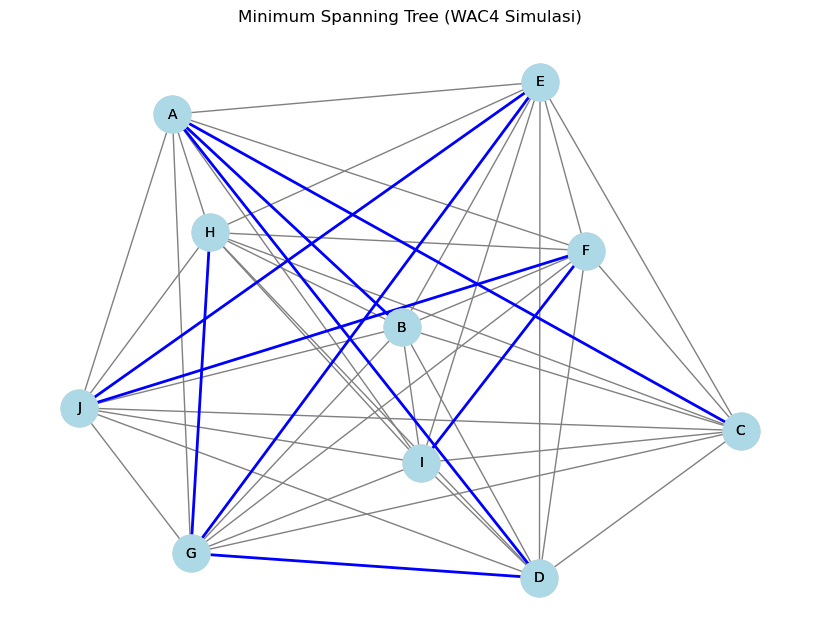

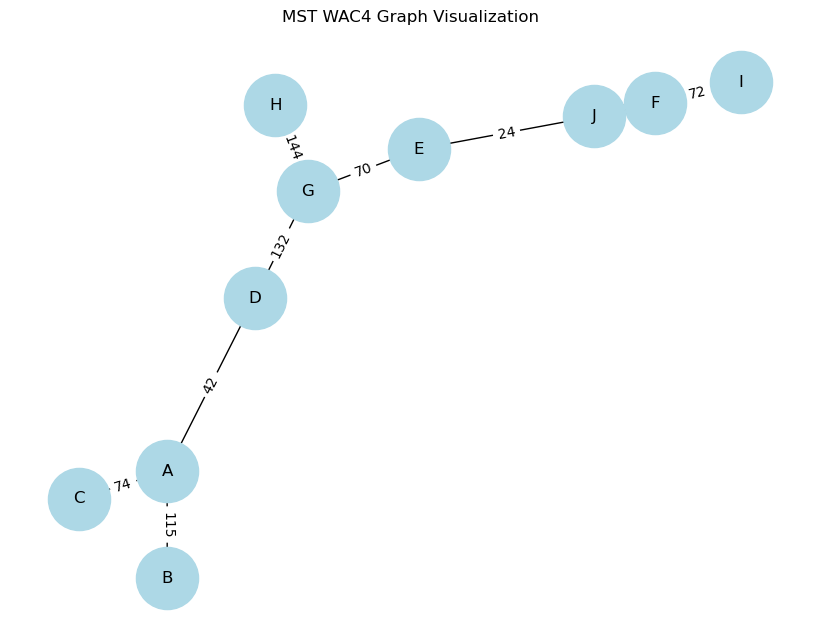

In [10]:
# Mengimpor pustaka yang dibutuhkan
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class WAC4:
    def __init__(self, graph_data):
        self.graph = nx.Graph()
        self.tree = nx.Graph()
        self.installed = set()

        # Memasukkan data graf ke dalam NetworkX
        for node, edges in graph_data.items():
            for neighbor, weight in edges:
                self.graph.add_edge(node, neighbor, weight=weight)

        self.n = len(self.graph.nodes)  # Jumlah node dalam graf
        self.max_degree = max(1, int((self.n - 1) / 3))  # Batas derajat node

        # Mengambil daftar HVT sesuai tabel
        self.hvt_groups = self.assign_hvt()
    
    def assign_hvt(self):
        """Menentukan HVT1, HVT2, HVT3 berdasarkan tabel yang diberikan"""
        hvt_dict = {
            10: {"HVT1": ["B"], "HVT2": ["C"], "HVT3": ["D"]},
            20: {"HVT1": ["B"], "HVT2": ["C"], "HVT3": ["D"]},
            30: {"HVT1": ["B", "C"], "HVT2": ["D", "E"], "HVT3": ["F", "G"]},
            40: {"HVT1": ["B", "C", "D"], "HVT2": ["E", "F", "G"], "HVT3": ["H", "I", "J"]},
            # Dan seterusnya mengikuti tabel dasar dari Prof.
        }
        return hvt_dict.get(self.n, {})

    def calculate_p(self, hvt):
        """Menghitung nilai p untuk pemilihan probabilistik HVT"""
        return len(hvt) / max(1, len(self.graph.nodes))

    def find_mst_wac4(self):
        """Menjalankan WAC4 untuk membangun MST sesuai HVT"""
        nodes = list(self.graph.nodes)
        root = nodes[0]
        self.tree.add_node(root)
        self.installed.add(root)

        for hvt_name in ["HVT1", "HVT2", "HVT3"]:
            hvt_nodes = self.hvt_groups.get(hvt_name, [])
            
            while len(self.installed) < self.n:
                p = self.calculate_p(hvt_nodes)
                q = np.random.rand()

                if q > p:
                    # Memilih edge dari semua yang tersedia
                    possible_edges = [(u, v, self.graph[u][v]["weight"]) for u in self.installed
                                      for v in self.graph.neighbors(u) if v not in self.installed]
                else:
                    # Memilih edge hanya dari HVT saat ini
                    possible_edges = [(u, v, self.graph[u][v]["weight"]) for u in self.installed
                                      for v in hvt_nodes if v not in self.installed and v in self.graph.neighbors(u)]

                if not possible_edges:
                    break

                # Pilih edge dengan bobot minimum
                u, v, weight = min(possible_edges, key=lambda x: x[2])

                if u not in self.tree:
                    self.tree.add_node(u)
                if v not in self.tree:
                    self.tree.add_node(v)

                # Pastikan tidak melebihi max_degree sebelum menambahkan edge
                if self.tree.degree[u] < self.max_degree and self.tree.degree[v] < self.max_degree:
                    self.tree.add_edge(u, v, weight=weight)
                    self.installed.add(v)
                    if v in hvt_nodes:
                        hvt_nodes.remove(v)

        return self.tree

# Studi Kasus: 10 Vertex Full terkoneksi
edges = {
    'A': [('B', 115), ('C', 74), ('D', 42), ('E', 955), ('F', 712), ('G', 660), ('H', 697), ('I', 450), ('J', 806)],
    'B': [('A', 115), ('C', 391), ('D', 504), ('E', 597), ('F', 537), ('G', 452), ('H', 709), ('I', 452), ('J', 784)],
    'C': [('A', 74), ('B', 391), ('D', 939), ('E', 472), ('F', 372), ('G', 272), ('H', 250), ('I', 644), ('J', 354)],
    'D': [('A', 42), ('B', 504), ('C', 939), ('E', 212), ('F', 515), ('G', 132), ('H', 248), ('I', 603), ('J', 642)],
    'E': [('A', 955), ('B', 597), ('C', 472), ('D', 212), ('F', 935), ('G', 70), ('H', 715), ('I', 328), ('J', 24)],
    'F': [('A', 712), ('B', 537), ('C', 372), ('D', 515), ('E', 935), ('G', 426), ('H', 987), ('I', 72), ('J', 227)],
    'G': [('A', 660), ('B', 452), ('C', 272), ('D', 132), ('E', 70), ('F', 426), ('H', 144), ('I', 814), ('J', 82)],
    'H': [('A', 697), ('B', 709), ('C', 250), ('D', 248), ('E', 715), ('F', 987), ('G', 144), ('I', 740), ('J', 703)],
    'I': [('A', 450), ('B', 452), ('C', 644), ('D', 603), ('E', 328), ('F', 72), ('G', 814), ('H', 740), ('J', 886)],
    'J': [('A', 806), ('B', 784), ('C', 354), ('D', 642), ('E', 24), ('F', 227), ('G', 82), ('H', 703), ('I', 886)]
}

# Running WAC4
wac4_solver = WAC4(edges)
mst = wac4_solver.find_mst_wac4()

# Menampilkan hasil MST
print("Edges dalam MST (WAC4):")
total_weight = 0
for u, v, data in mst.edges(data=True):
    print(f"{u} -- {v} : {data['weight']}")
    total_weight += data['weight']

print(f"Total WAC4 Weight: {total_weight}")

# Visualisasi MST
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(wac4_solver.graph)  # Posisi untuk menggambar graf

# Gambar seluruh graf
nx.draw(wac4_solver.graph, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=700, font_size=10)

# Gambar MST dengan warna berbeda
nx.draw(wac4_solver.tree, pos, with_labels=True, node_color='lightblue', edge_color='blue', node_size=700, font_size=10, width=2)

plt.title("Minimum Spanning Tree (WAC4 Simulasi)")
plt.show()

Gmst=mst
pos = nx.spring_layout(Gmst)  # Position nodes for visual representation
plt.figure(figsize=(8, 6))
nx.draw(Gmst, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(Gmst, pos, edge_labels={(u, v): f'{data["weight"]}' for u, v, data in Gmst.edges(data=True)})
plt.title(f"MST WAC4 Graph Visualization")
plt.show()
